In [61]:
## https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023?resource=download
## Simple linear regression, predict/interpret DS salaries

In [62]:
import pandas as pd
df = pd.read_csv('v7_Latest_Data_Science_Salaries.csv')
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [3]:
df.shape

(5736, 11)

In [63]:
#df.isnull().sum() # no nulls, thank you kaggle (otherwise maybe use median/most common, exclude, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


In [5]:
df.describe() ## just use usd...?

,Salary,Salary in USD,Year
count,5.736000e+03,5736.000000,5736.000000
mean,1.831648e+05,144264.031032,2022.743375
std,5.637801e+05,70646.771842,0.644506
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,93300.000000,2023.000000
50%,1.397250e+05,136771.500000,2023.000000
75%,1.880000e+05,185000.000000,2023.000000
max,3.040000e+07,750000.000000,2024.000000


In [6]:
df.columns= df.columns.str.lower() ## lower case to make this easier
df.head()

,job title,employment type,experience level,expertise level,salary,salary currency,company location,salary in usd,employee residence,company size,year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [7]:
df['employment type'].nunique()

4

In [8]:
df.groupby(df['employment type'])['salary'].count() ## Let's just look at full time, as it's the vast majority.

employment type
Contract       19
Freelance      12
Full-Time    5690
Part-Time      15
Name: salary, dtype: int64

In [9]:
df.groupby(df['company location'])['salary'].count().sort_values(ascending=False) ## going from 5.7K to 4.6K for us (maybe add UK/Canada to get to 5.2K)

company location
United States           4564
United Kingdom           377
Canada                   218
Germany                   75
Spain                     60
                        ... 
Moldova, Republic of       1
Mauritius                  1
Malta                      1
Malaysia                   1
Algeria                    1
Name: salary, Length: 75, dtype: int64

In [10]:
df[df['employee residence'] != df['company location']].shape ## Ahh so in some places company location & employee residence differ...
##Let's check Salaries

(125, 11)

In [11]:
#df[df['employee residence'] == 'United States']['salary currency'].unique() ## still a mix, but we can just use usd value anyway
## Gonna just look at US for both employee residence and company location to make it simpler...

In [12]:
df.groupby(df['year'])['salary'].count() ## past 5 years, but mostly 2022-23.

year
2020      75
2021     215
2022    1021
2023    4221
2024     204
Name: salary, dtype: int64

In [13]:
df.groupby(['experience level','expertise level'])['salary'].count() ## these are effectively the same columns

experience level  expertise level
Entry             Junior              524
Executive         Director            227
Mid               Intermediate       1455
Senior            Expert             3530
Name: salary, dtype: int64

In [14]:
df.groupby(df['company size'])['salary'].count() ## Not sure how they define this, but general

company size
Large      550
Medium    5016
Small      170
Name: salary, dtype: int64

In [15]:
df['job title'].nunique()

132

In [16]:
df.groupby(df['job title'])['salary'].count().sort_values(ascending=False).head(10)

job title
Data Engineer                1097
Data Scientist               1051
Data Analyst                  772
Machine Learning Engineer     542
Analytics Engineer            218
Research Scientist            177
Data Architect                149
Research Engineer             113
ML Engineer                   102
Data Science Manager           83
Name: salary, dtype: int64

In [17]:
## Just look at Full Time
## Maybe US only (or add UK/GB to go from 4.6K to 5.2K)
## employment type vs experience level adds nothing..
## Include all years but make it categorical, not numeric.
## Not sure what company size is (assuming employees but not entirely sure/maybe self selected... but can one hot encode

## biggest open question is about job title, with 132. Need to breakt that down a bit or combine some

In [18]:
jt = df['job title'].unique()
jt

array(['Data Engineer', 'Data Analyst', 'Business Intelligence Developer',
       'BI Developer', 'Business Intelligence Analyst', 'Data Developer',
       'AI Architect', 'Data Architect', 'Data Scientist',
       'Machine Learning Engineer', 'Data Science', 'Research Engineer',
       'Data Science Manager', 'Data Analytics Manager',
       'Research Analyst', 'AI Engineer', 'Research Scientist',
       'Data Science Engineer', 'Data Product Manager',
       'Analytics Engineer', 'Data Specialist', 'Data Modeler',
       'ETL Developer', 'Data Strategist', 'Prompt Engineer',
       'Data Science Lead', 'ML Engineer', 'Data Quality Manager',
       'Applied Scientist', 'Head of Data',
       'Business Intelligence Engineer', 'Data Science Consultant',
       'Machine Learning Scientist', 'Business Intelligence Manager',
       'Data Manager', 'Computer Vision Engineer', 'AI Product Manager',
       'Data Analytics Lead', 'Director of Data Science',
       'Data Product Owner', 'Machin

In [19]:
## combining these to simplify:
## Take out all 'Lead','Staff','Principal' ## covered in level (other column)
## Maybe split into DS, DE, ML, Manager (Head of, etc). 
replace = df['job title'].copy() ## copy to replace later
print('before: '+str(replace.nunique()))
remain = []
## Manager keywords
m = 'Manager'
for i,x in enumerate(df['job title']):
    if(  'Manager' in x or 
         'Analytics Lead' in x or 
         'Data Lead' in x or 
         'Head' in x):
        replace[i] = 'Manager'
    elif('Data Engineer' in x or
         'Data Developer' in x or
         'Data Architect' in x or
         'ETL' in x):
        replace[i] = 'Data Engineer'
    elif('Data Scientist' in x or 
         'Data Science' in x):
        replace[i] = 'Data Scientist'
    elif('Machine Learning' in x or 
         'ML' in x or 
         'AI' in x or 
         'NLP' in x or  
         'Engineer' in x or 
         'Deep Learning' in x or 
         'Scientist' in x or 
         'Model' in x):
        replace[i] = 'ML'
    elif('Data Analyst' in x or 
         'Business Intelligence' in x or 
         'Analyst' in x or 
         'Specialist' in x or 
         'Data Strategist' in x or 
         'Data Analytics Consultant' in x or 
         'BI' in x):
        replace[i] = 'Data Analyst'
    else:
        replace[i] = 'Drop'
        remain.append(x)
        #print(x)
print('after: '+str(replace.nunique()))
print(set(remain))

before: 132
after: 6
{'Data Product Owner', 'Autonomous Vehicle Technician'}


In [20]:
## fine to lose the above 6 data points as I'm not sure how to fit those jobs and it's so few.
df['job grouping'] = replace
df.head()

,job title,employment type,experience level,expertise level,salary,salary currency,company location,salary in usd,employee residence,company size,year,job grouping
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024,Data Engineer
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024,Data Engineer
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024,Data Analyst
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024,Data Analyst
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024,Data Analyst


In [21]:
## clean up sample
## Drop some one hot encoded variables to avoid multicollinearity (ie include A, B, C when A+B=C) to not mess up results (ie flipping signals)

In [22]:
## drop extra rows:
## Full Time only
## US only (for now, might add UK/CA) -- both company location & employee residence...
df2 = df[(df['employment type'] == 'Full-Time') & 
         (df['company location'] == 'United States') & 
         (df['employee residence'] == 'United States') &
         (df['job grouping'] != 'Drop') & ## already dropped by other filters, but adding here for completeness
         (df['salary currency'] == 'United States Dollar')] # 2 british pound... just use USD 
## don't have to care about currency either since we can just use usd salary, but quick check
#df2.groupby(['salary currency']).count()

In [23]:
print(df.shape)
print(df2.shape)

(5736, 12)
(4494, 12)


In [24]:
df3 = df2[['salary in usd','job grouping','year','company size','experience level']]
df3.head()

,salary in usd,job grouping,year,company size,experience level
0,138000,Data Engineer,2024,Medium,Mid
1,86000,Data Engineer,2024,Medium,Mid
2,179000,Data Analyst,2024,Medium,Entry
3,112000,Data Analyst,2024,Medium,Entry
4,92000,Data Analyst,2024,Medium,Mid


<AxesSubplot:>

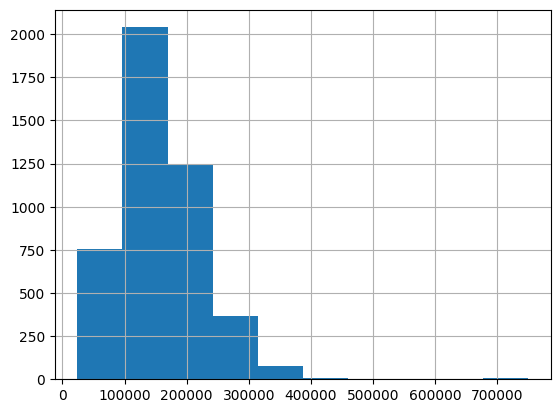

In [25]:
df3['salary in usd'].hist()

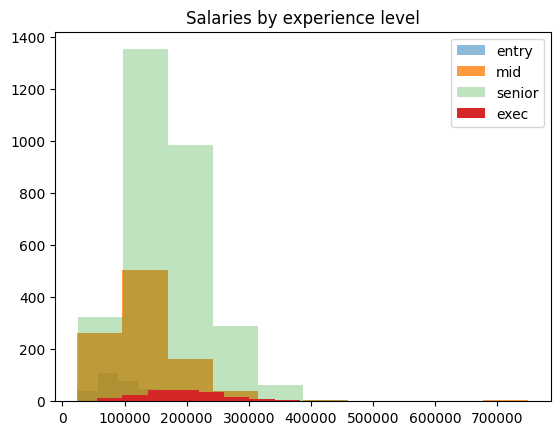

In [26]:
import matplotlib.pyplot as plt

y1 = df3['salary in usd'][df3['experience level'] == 'Entry']
y2 = df3['salary in usd'][df3['experience level'] == 'Mid']
y3 = df3['salary in usd'][df3['experience level'] == 'Senior']
y4 = df3['salary in usd'][df3['experience level'] == 'Executive']

plt.hist(y1, label='entry',alpha = 0.5) ## few
plt.hist(y2, label='mid',alpha=0.8)
plt.hist(y3, label='senior',alpha=0.3)
plt.hist(y4, label='exec',alpha = 1) ## few
plt.title('Salaries by experience level')
plt.legend(loc='upper right')
plt.show()

## Looks pretty useful as a signal (see entry vs exec mean + variance)
## Maybe just exclude largest (senior) for multicollinearity

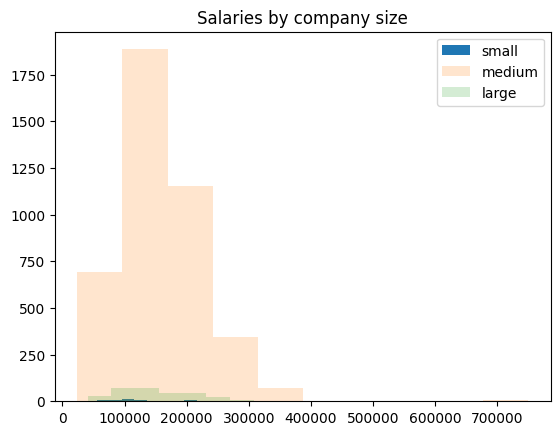

In [27]:
y1 = df3['salary in usd'][df3['company size'] == 'Small']
y2 = df3['salary in usd'][df3['company size'] == 'Medium'] 
y3 = df3['salary in usd'][df3['company size'] == 'Large']

plt.hist(y1, label='small',alpha = 1) 
plt.hist(y2, label='medium',alpha=0.2) ## almost all
plt.hist(y3, label='large',alpha=0.2)
plt.title('Salaries by company size')
plt.legend(loc='upper right')
plt.show()

## Mostly mid.... drowns out other signals
## Maybe just exclude largest (medium) for multicollinearity

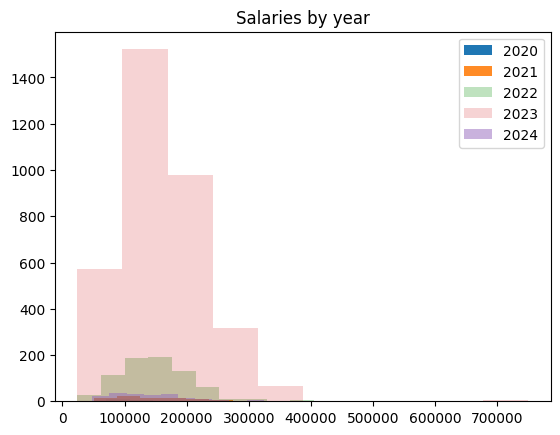

In [28]:
y1 = df3['salary in usd'][df3['year'] == 2020]
y2 = df3['salary in usd'][df3['year'] == 2021]
y3 = df3['salary in usd'][df3['year'] == 2022]
y4 = df3['salary in usd'][df3['year'] == 2023]
y5 = df3['salary in usd'][df3['year'] == 2024]

plt.hist(y1, label='2020',alpha = 1) ## few
plt.hist(y2, label='2021',alpha=0.9)
plt.hist(y3, label='2022',alpha=0.3) ## next biggest
plt.hist(y4, label='2023',alpha=0.2) # majority
plt.hist(y5, label='2024',alpha=0.5)
plt.title('Salaries by year')
plt.legend(loc='upper right')
plt.show()

## hard to tell but might have some signal

In [29]:
df3.groupby(['job grouping'])['salary in usd'].count()

job grouping
Data Analyst       925
Data Engineer     1036
Data Scientist     955
ML                1356
Manager            222
Name: salary in usd, dtype: int64

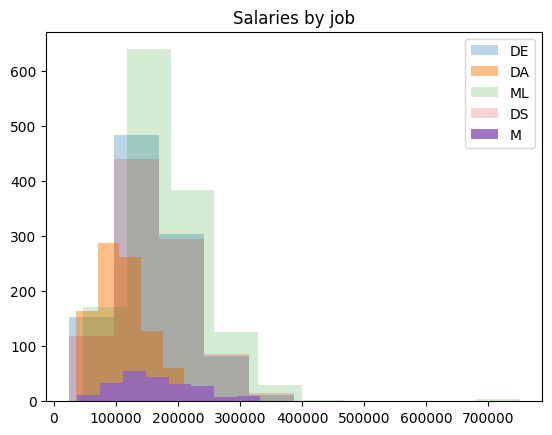

In [30]:
y1 = df3['salary in usd'][df3['job grouping'] == 'Data Engineer']
y2 = df3['salary in usd'][df3['job grouping'] == 'Data Analyst']
y3 = df3['salary in usd'][df3['job grouping'] == 'ML']
y4 = df3['salary in usd'][df3['job grouping'] == 'Data Scientist']
y5 = df3['salary in usd'][df3['job grouping'] == 'Manager']

plt.hist(y1, label='DE',alpha = 0.3) ## few
plt.hist(y2, label='DA',alpha=0.5)
plt.hist(y3, label='ML',alpha=0.2) ## next biggest
plt.hist(y4, label='DS',alpha=0.2) # majority
plt.hist(y5, label='M',alpha=0.9)
plt.title('Salaries by job')
plt.legend(loc='upper right')
plt.show()

## Yup looks strongly informative.
## DA is lower, Manager is spread/fewer
## ML looks highest (but hard to tell), then DE/DS similar

In [31]:
df3['salary in usd'].describe()

count      4494.000000
mean     157833.327325
std       66514.515184
min       24000.000000
25%      110943.750000
50%      149040.000000
75%      195000.000000
max      750000.000000
Name: salary in usd, dtype: float64

In [32]:
## Might as well go through all above charts since it's only 4 signals and we'll split out.
## job group seems like a strong signal 
## experience level as well
## company size less so, but almost all medium
## Year is hard to tell, mostly 2023, 2022 - but we'll see

## Avg sal is 158K, min is 24K, max is 750K

## Might want to adjust based on outliers (standardize, clip, etc if need be)
## Don't need lasso regression given so few signals, just see how strong each is (gonna do this anyway though to refresh my memory)
## One hot encode/get dummies to get categorical data
## Remove one of each to keep multicollinearity low (see correlation matrix)

In [33]:
Y = df3['salary in usd']
X_raw = df3[['job grouping','year','company size','experience level']] ## just 4 vars (just US, Full Time given small sample - all categorical)

In [34]:
# ## Example: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
# import pandas as pd
# s = pd.Series(list('abca'))
# pd.get_dummies(s)

In [35]:
one_hot_year = pd.get_dummies(X_raw['year'])
one_hot_size = pd.get_dummies(X_raw['company size'])
one_hot_exp = pd.get_dummies(X_raw['experience level'])
one_hot_job = pd.get_dummies(X_raw['job grouping'])

In [36]:
X_oh = X_raw.join(one_hot_year).join(one_hot_size).join(one_hot_exp).join(one_hot_job)
drop_cols = ['year','company size','experience level','job grouping',
            2023,'Medium','Senior','ML'] ## to not have these sum to 100%, dropping largest (for multicollinearity)

X = X_oh.drop(drop_cols,axis = 1)
X.head()

,2020,2021,2022,2024,Large,Small,Entry,Executive,Mid,Data Analyst,Data Engineer,Data Scientist,Manager
0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,1,0,0,0


In [37]:
print(Y.shape)
print(X.shape)

(4494,)
(4494, 13)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(y_train.shape)
print(X_train.shape)

(3010,)
(3010, 13)


/tmp/ipykernel_1098/1305086832.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

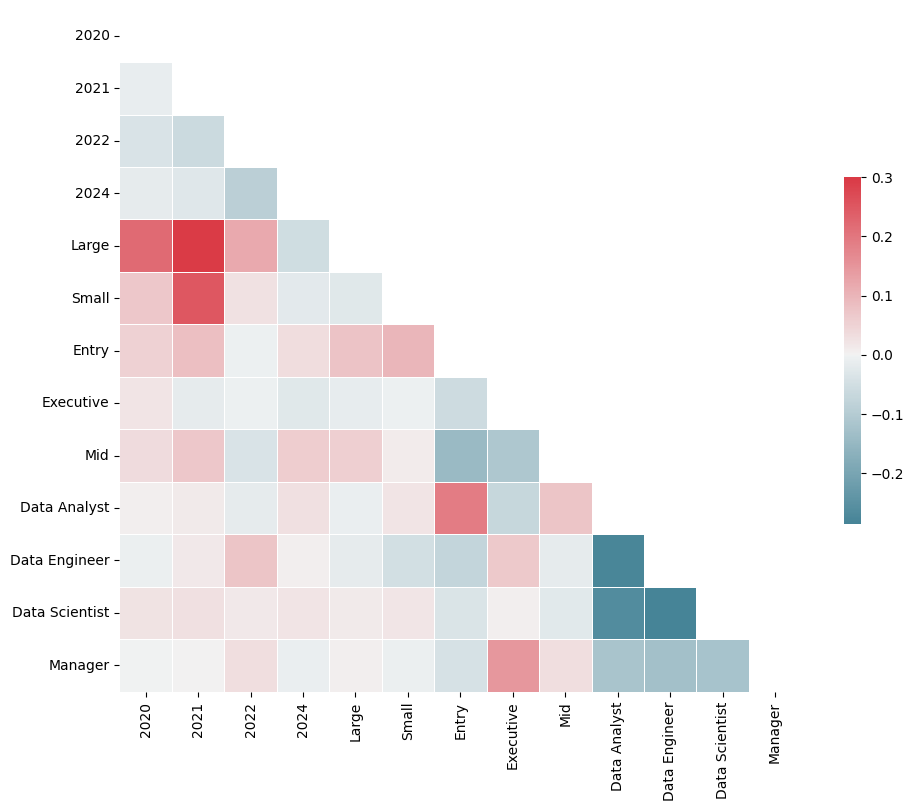

In [39]:
import numpy as np
## seaborne correlation map
import seaborn as sns

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Nothing too crazy here, < 0.3 abs value correlation, so we're good with results as is (above with model output)

In [40]:
## SM has the more standard R output of model results. Whereas Sklearn is more about ML/predictions
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary in usd   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          2.18e-143
Time:                        02:53:44   Log-Likelihood:                -37383.
No. Observations:                3010   AIC:                         7.479e+04
Df Residuals:                    2996   BIC:                         7.488e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.907e+05   2158.270     88.

In [41]:
## R^2 0.21 isn't great, but only 4 vars here. 
# FYI we need a constant - though the R^2 is higher without it. Mainly because:
# R^2 depends on having a constant for explanability by independent variables
# residuals sum to zero
# Centering, model interpretations (ie if all vars were 0)

## Results makes intuitive sense / decent explanability with model:
## Data analyst < MLE salary is the biggest thing
## Entry/Mid less than Senior and much less than exec.
## Data eng, DS make less than MLE (even manager but by the least
## Small company hurts a bit and large vs medium doesn't really matter
## 2022 was worse, 2020 a bit better.

In [42]:
## Iterate a bit to see which vars are the most important if restrictions are placed on the number of vars
from sklearn.linear_model import Lasso
## Larger the alpha, the higher the cutoff for variables (ie less variables)
lassoReg = Lasso(alpha=40,normalize=True)
res = lassoReg.fit(X_train,y_train)
la = res.coef_.tolist()
fmt = '{:<8}{:<30}{}'

print(fmt.format(' ', 'Variable', 'Lasso_coef'))
for i, (name, grade) in enumerate(zip(X_train, la)):
    print(fmt.format(i, name, grade))
    
## Executive level experience helps (entry/mid hurts)
## Data Analyst is lower than MLE, DE slightly lower, DS even less slightly lower
## Manager seems not too influential/somewhat on part with MLE
## 2020 was a bit higher, 2022 a bit lower, not sure why there
## Small company hurts abit relative to middle/large

        Variable                      Lasso_coef
0       2020                          3683.8662566262524
1       2021                          -0.0
2       2022                          -3327.0536125042013
3       2024                          -0.0
4       Large                         0.0
5       Small                         -4768.315751960096
6       Entry                         -40664.936700937586
7       Executive                     21081.761545759146
8       Mid                           -22606.875247537613
9       Data Analyst                  -48431.07887248988
10      Data Engineer                 -10015.054490402088
11      Data Scientist                -1758.7171996654554
12      Manager                       -0.0


/app/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()  # initialize a regression object
regr.fit(X_train, y_train)  # fit the model to our data

/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'y_pred - Predicted')

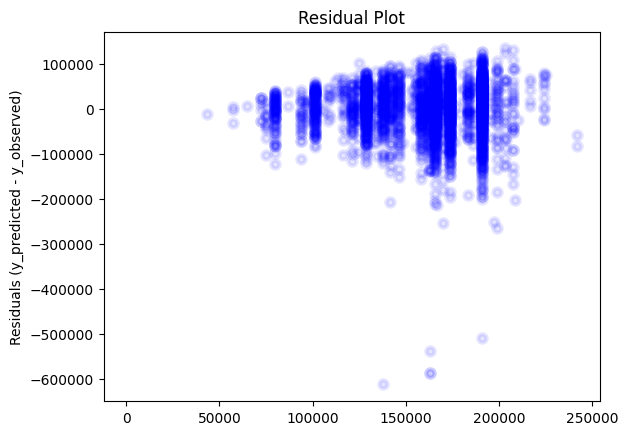

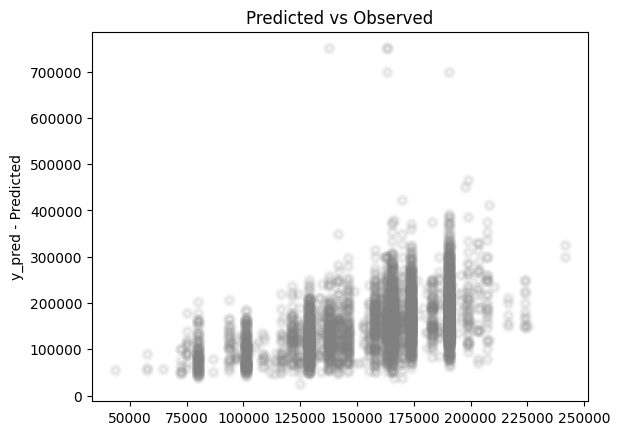

In [44]:
## Check residuals & predicted vs observed
y_pred = regr.predict(X_train) ## model output vs actuals in train

plt.figure(0)
plt.scatter(y_pred, y_pred - y_train, color='blue', linewidth=3, alpha = 0.1)
plt.hlines(y=0, xmin=-0.06, xmax=0.08)
plt.title ('Residual Plot')
plt.ylabel('Residuals (y_predicted - y_observed)')

plt.figure(1)
plt.scatter(y_pred, y_train, color = 'grey', linewidth=3, alpha = 0.1)
plt.title ('Predicted vs Observed')
plt.ylabel('y - Observed')
plt.ylabel('y_pred - Predicted')

3010
removed: 
0
0.0 %


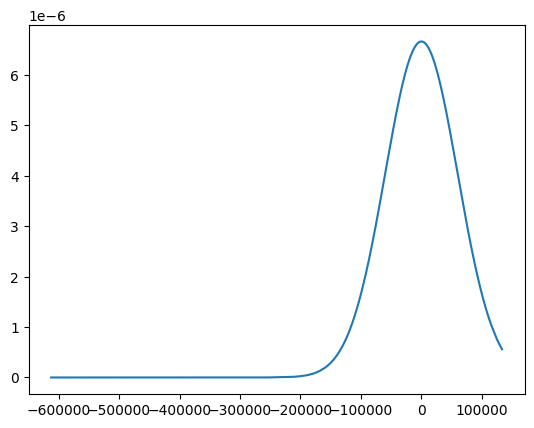

In [45]:
import scipy.stats as stats
import numpy as np
## Check error distribution
e = y_pred - y_train
oh = e.sort_values()
print(oh.shape[0])
err=oh
#err = oh[oh >-0.05]
print("removed: ")
print(oh.shape[0]-err.shape[0])
print(100.0*(oh.shape[0]-err.shape[0])/oh.shape[0],"%")
emean = np.mean(err)
estd = np.std(err)
pdf = stats.norm.pdf(err, emean, estd)
plt.plot(err, pdf) 

## Normally distributed looking errors, just some low end outliers

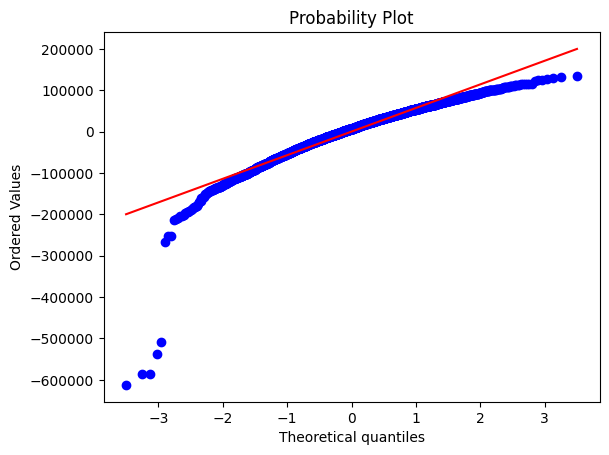

In [46]:
import pylab 

stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

## Some large negatives, meaning understimating salary with some higher outliers.

In [48]:
## Test model predictions

#https://www.linkedin.com/pulse/training-running-linear-model-using-scikit-learn-ali-nemati/
model = LinearRegression()

()
# Train the model on the training set
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


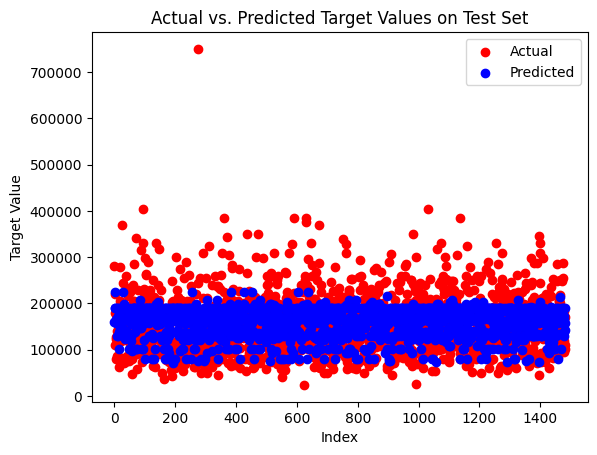

In [49]:
# Plot the actual and predicted target values on the test set
fig, ax = plt.subplots()
ax.scatter(range(len(y_test)), y_test, color='red', label='Actual')
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted')
ax.set_xlabel('Index')
ax.set_ylabel('Target Value')
ax.set_title('Actual vs. Predicted Target Values on Test Set')
ax.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
# Compute the mean squared error between the predicted and actual target value
mse = mean_squared_error(y_test, y_pred) 
print('Mean Squared Error:', mse) 

## Very high error, issue with model / target value is not standardized.

Mean Squared Error: 3318366196.826011


In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the target variable y
scaler = StandardScaler()

y_reshaped = np.array(Y).reshape(-1, 1)
y_scaled = scaler.fit_transform(y_reshaped)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Calculate Mean Squared Error on the scaled test set
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f'Mean Squared Error on Scaled Test Set: {mse_scaled}')

Mean Squared Error on Scaled Test Set: 0.8086272139508357


/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


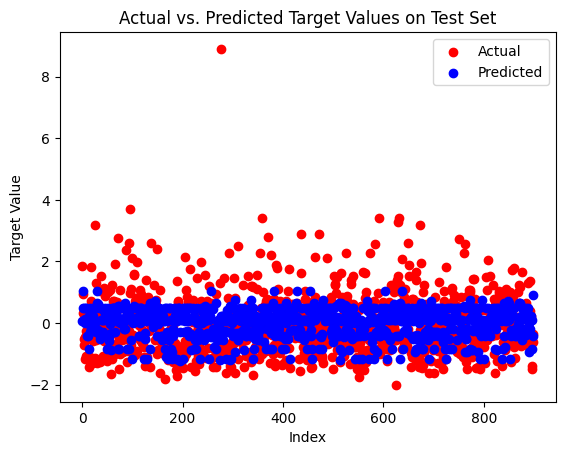

In [57]:
# Plot the actual and predicted target values on the test set
fig, ax = plt.subplots()
ax.scatter(range(len(y_test)), y_test, color='red', label='Actual')
ax.scatter(range(len(y_pred_scaled)), y_pred_scaled, color='blue', label='Predicted')
ax.set_xlabel('Index')
ax.set_ylabel('Target Value')
ax.set_title('Actual vs. Predicted Target Values on Test Set')
ax.legend()
plt.show()

In [60]:
## Stepwise function isn't as efficient with a LOT of variables (unlike lasso)


#import statsmodels.api as sm
#import pandas as pd

# Add a constant term to the feature matrix
X_with_const = sm.add_constant(X)

# Stepwise forward selection
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')  # Explicitly set dtype to 'float64'
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add 1 feature: {best_feature}, p-value: {best_pval:.4f}')
        
        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop 1 feature: {worst_feature}, p-value: {worst_pval:.4f}')
        
        if not changed:
            break
    
    return included

# Perform stepwise forward and backward selection
selected_features = stepwise_selection(X, Y)

# Print the final selected features
print("Selected Features:", selected_features)

# Train the model using the selected features
final_model = sm.OLS(Y, sm.add_constant(X[selected_features])).fit()

# Print the summary of the final model
print(final_model.summary())

Add 1 feature: Data Analyst, p-value: 0.0000
Add 1 feature: Entry, p-value: 0.0000
Add 1 feature: Mid, p-value: 0.0000
Add 1 feature: Data Engineer, p-value: 0.0000
Add 1 feature: Data Scientist, p-value: 0.0000
Add 1 feature: Executive, p-value: 0.0000
Add 1 feature: Manager, p-value: 0.0000
Add 1 feature: 2022, p-value: 0.0001
Selected Features: ['Data Analyst', 'Entry', 'Mid', 'Data Engineer', 'Data Scientist', 'Executive', 'Manager', 2022]
                            OLS Regression Results                            
Dep. Variable:          salary in usd   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          3.18e-220
Time:                        03:02:10   Log-Likelihood:                -55760.
No. Observations:                4494   AIC:                         1.115e+05

In [ ]:
## Because there are few variables, stepwise is a nice way to look at this
## The downside is overfitting (memorizing instead of generalizing), and
## maybe getting a local maxima. But its simple ad easy to interpret/fun.
## lasso regression also helps reduce variables with regularization. 
## Its also more efficient (one regression) and gets a global maxima
## But needs parameter tuning and is less intuitive.

In [63]:
## future: Find dataset with numeric data, not just categorical.
## Future: Logistic regression/classification

/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/app/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error: 3650264889.8714523


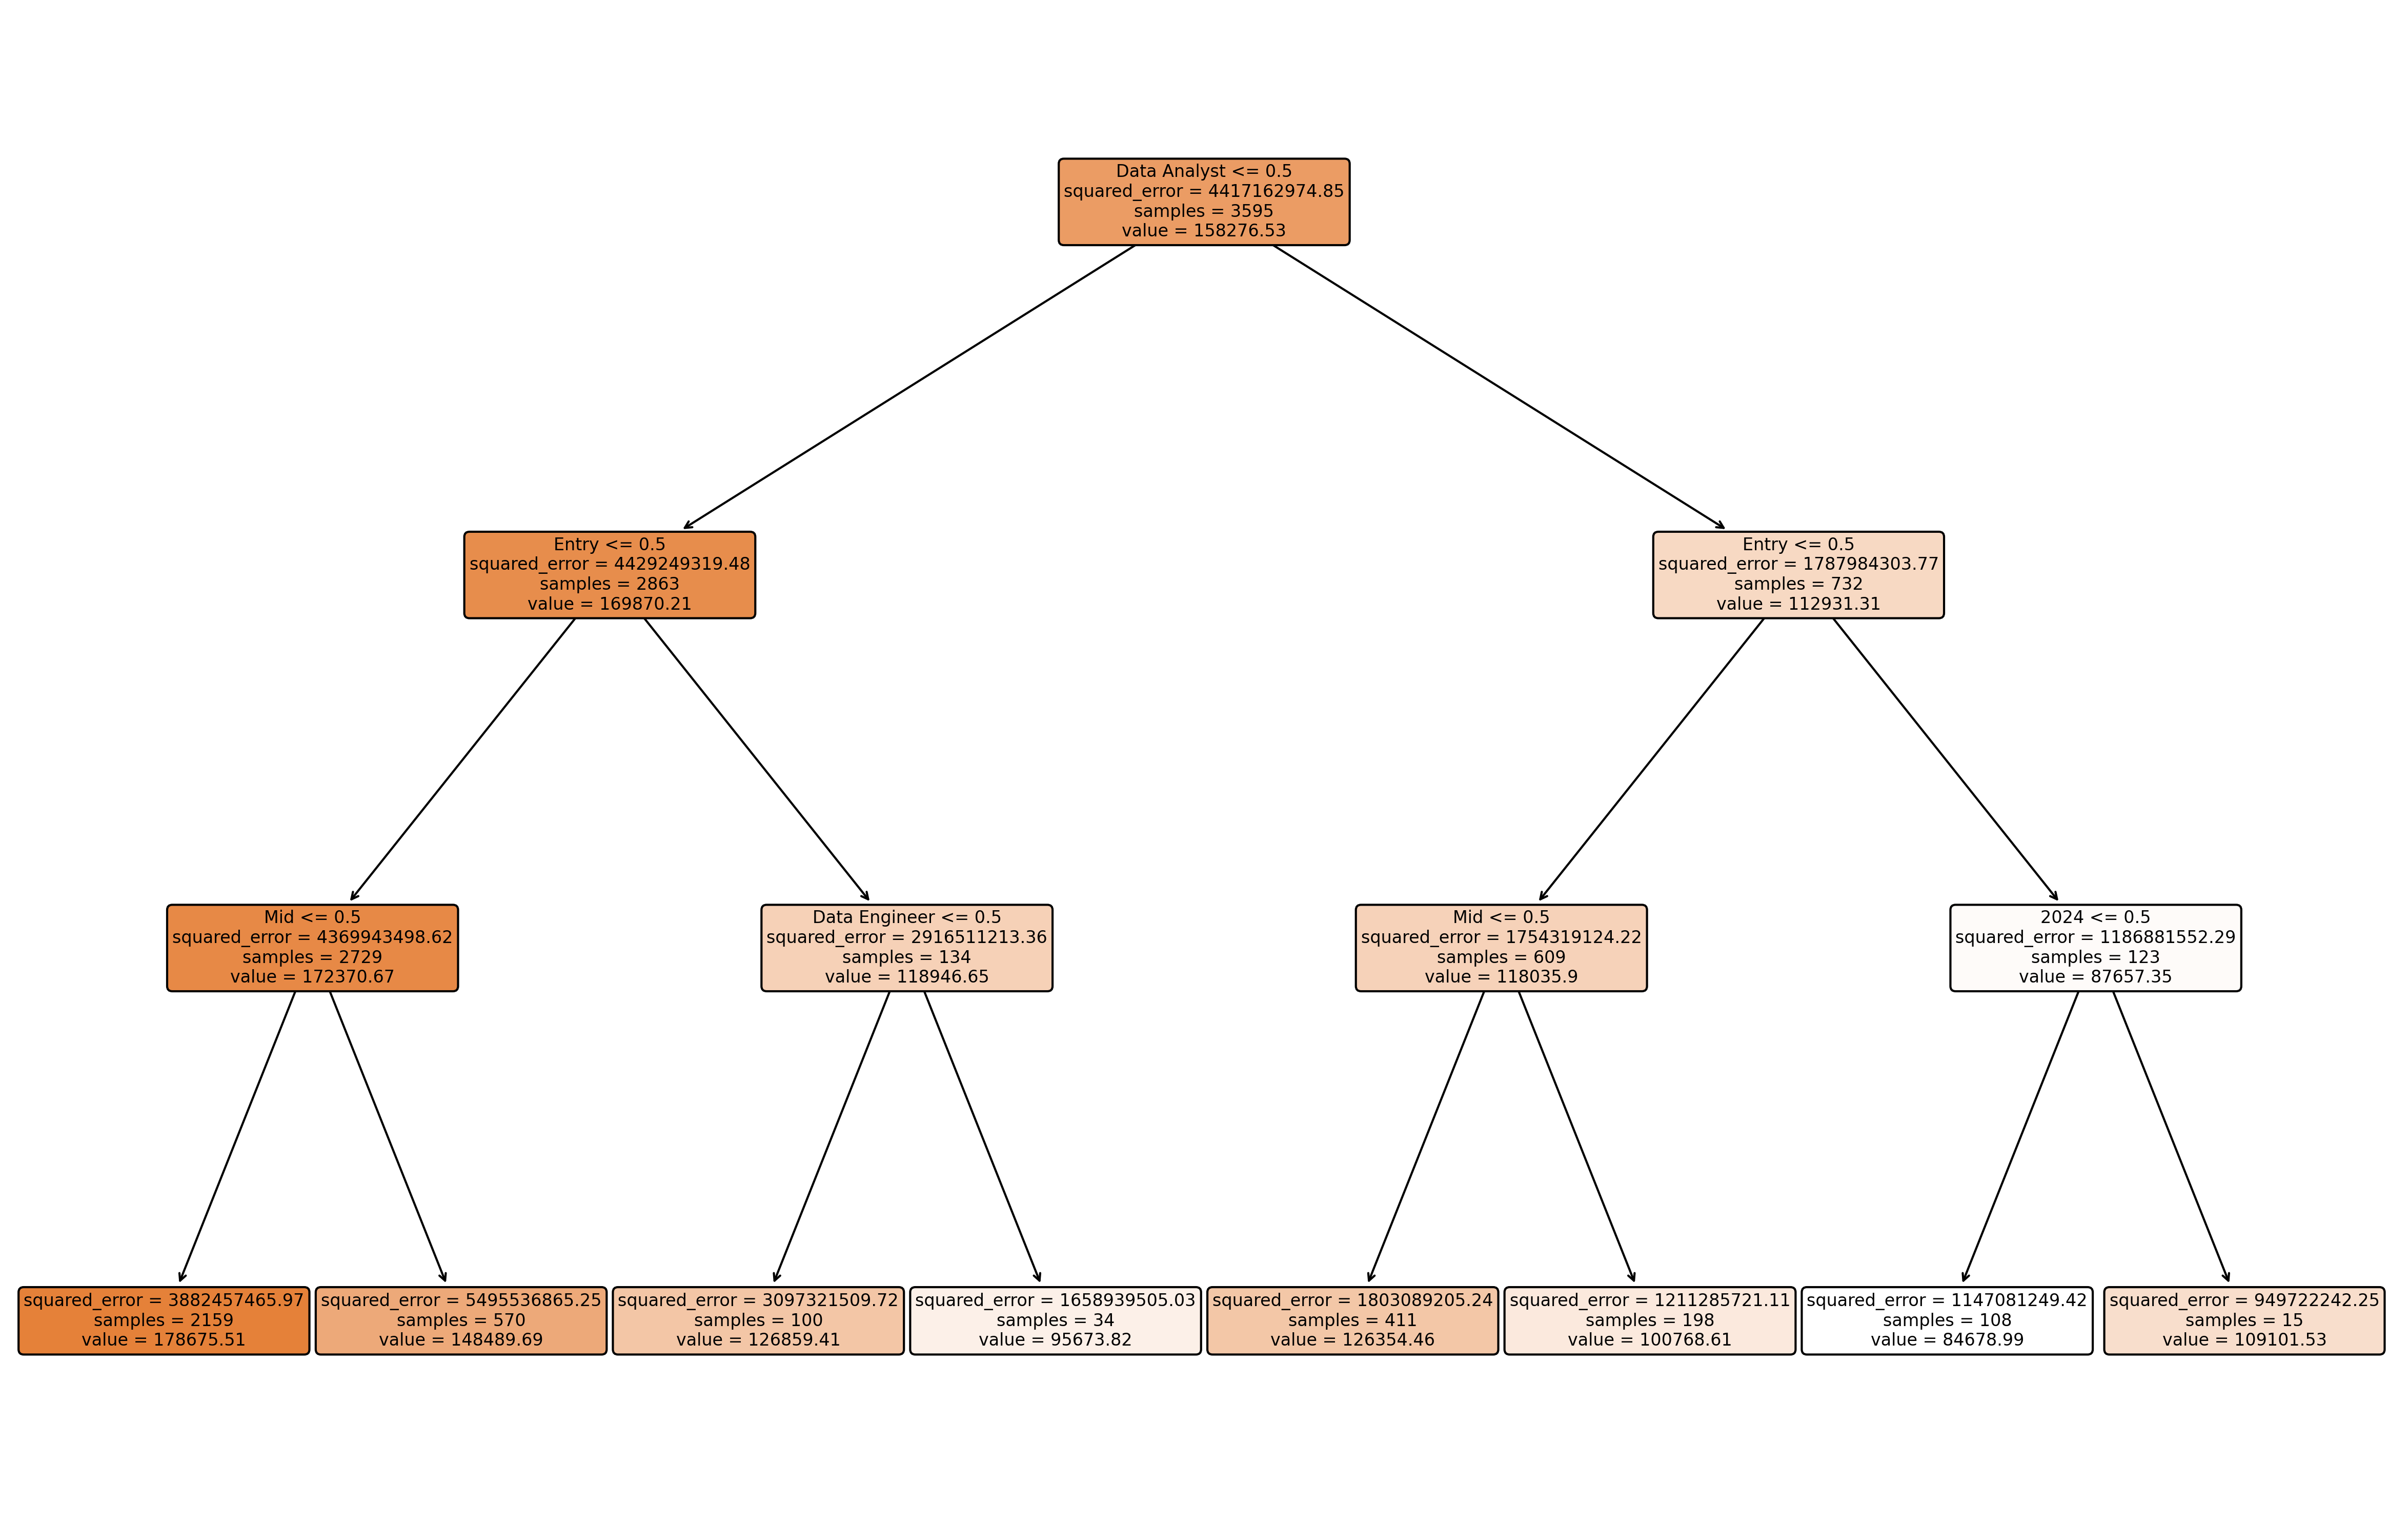

In [65]:
## Decision Tree for fun
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Comment out the StandardScaler import
# from sklearn.preprocessing import StandardScaler

# Comment out the standardization part
# Standardize the target variable
# scaler = StandardScaler()
# y_standardized = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Comment out the reverse standardization for evaluation
# y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the model without reverse standardization
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the decision tree with improved readability
plt.figure(figsize=(16, 10), dpi=300)

# Visualize the decision tree with improved readability and layout adjustments
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, rounded=True, precision=2, fontsize=8)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()